# Machine Learning Project Kelompok 4
- Andra Rizky Ramadhan
- Tania Kayla Safina
- Saffana Hadaina
- Fadel Achmad Daniswara (Project Leader)
- Haris Pratama Wibowo

## Mathematical Model for Classification Problem
Ini Math Model

## Flowchart
Ini Flowchart Bang

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

fileUpload = files.upload()

In [ ]:
from google.colab import files

fileUpload = files.upload()

## Data Wrangling

### Gathering Data
- Proses gathering data disini terdapat proses merging antara dua dataset, yaitu day.csv dan hour.csv. Hasil gabungan kedua dataset ini akan menghasilkan dataset baru, yaitu bike_sharing_df dengan kolom-kolom yang sama, namun terdapat kolom "hr" yang hanya ada di dataset hour.csv.

- Disini saya juga melakukan proses re-arrangement dataset yang berfungsi untuk mengubah urutan kolom "hr" yang tadinya berada pada posisi paling belakang menjadi di sebelah kanan kolom "dteday".

In [ ]:
# Gathering two dataset
bike_per_day_df = pd.read_csv("day.csv")
bike_per_hour_df = pd.read_csv("hour.csv")

# print(f"Dataset Bike per Day\n {bike_per_day_df.head()}\n")
# print(f"Dataset Bike per Hour\n {bike_per_hour_df.head()}")

# Merging two dataset
bike_sharing_df = pd.merge(
    left=bike_per_day_df,
    right=bike_per_hour_df[["dteday","hr"]],
    how="left",
    on="dteday"
)

# Re-arrange Dataset
columns = bike_sharing_df.columns.tolist()
columns.insert(2, columns.pop(columns.index("hr")))
bike_sharing_df = bike_sharing_df[columns]

print(f"Bike Sharing Dataset \n {bike_sharing_df.head()}")

Bike Sharing Dataset 
    instant      dteday  hr  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   0       1   0     1        0        6           0   
1        1  2011-01-01   1       1   0     1        0        6           0   
2        1  2011-01-01   2       1   0     1        0        6           0   
3        1  2011-01-01   3       1   0     1        0        6           0   
4        1  2011-01-01   4       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.344167  0.363625  0.805833   0.160446     331         654   
2           2  0.344167  0.363625  0.805833   0.160446     331         654   
3           2  0.344167  0.363625  0.805833   0.160446     331         654   
4           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  
0  985  
1  985  
2  985  
3  

**Insight:**
- Dataset bike_per_day_df dan bike_per_hour_df memiliki kolom yang sama, yang membedakan hanyalah kolom hour pada bike_per_hour_df.
- Melakukan proses merging pada kedua dataset tersebut, sehingga hanya akan ada satu dataset yaitu bike_sharing_df.
- Melakukan proses re-arrange dari dataset gabungan yang baru. Hal ini dilakukan karena kolom "hr" berada di paling belakang. Kolom "hr" dipindahkan ke samping kanan "dteday"

### Assessing Data

- Mengecek dataset bike_sharing_df jika terdapat nilai yang duplikat atau nilai null.

In [19]:
# Checking Null Values
print(f"Null Values from Dataset \n{bike_sharing_df.isnull().sum()}\n")

# Checking Duplicated Values
print(f"Duplicated Values from Dataset : {bike_sharing_df.duplicated().sum()}\n")

Null Values from Dataset 
instant       0
dteday        0
hr            0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicated Values from Dataset : 0



### Cleaning Data

- Mengecek sekaligus memperbaiki jika terdapat format date and time yang salah.

In [20]:
# Fix the Date and Time Format
bike_sharing_df["dteday"] = pd.to_datetime(bike_sharing_df["dteday"], format="%Y-%m-%d")
incorrectDate = bike_sharing_df[bike_sharing_df["dteday"].isna()]
print(incorrectDate)


Empty DataFrame
Columns: [instant, dteday, hr, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


- Menghapus kolom yang tidak sesuai dengan pertanyaan bisnis diatas. Kolom-kolom ini tidak berpengaruh signifikan terhadap analisis.

In [21]:
# Drop Unused Column
bike_sharing_df.drop(columns=["temp", "atemp", "hum", "windspeed"], inplace=True)
print(bike_sharing_df.head())

   instant     dteday  hr  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01   0       1   0     1        0        6           0   
1        1 2011-01-01   1       1   0     1        0        6           0   
2        1 2011-01-01   2       1   0     1        0        6           0   
3        1 2011-01-01   3       1   0     1        0        6           0   
4        1 2011-01-01   4       1   0     1        0        6           0   

   weathersit  casual  registered  cnt  
0           2     331         654  985  
1           2     331         654  985  
2           2     331         654  985  
3           2     331         654  985  
4           2     331         654  985  


- Menghapus outlier yang ada pada kolom "casual".

In [22]:
# Drop Outlier for casual columns
Q1 = bike_sharing_df["casual"].quantile(0.25)
Q3 = bike_sharing_df["casual"].quantile(0.75)

IQR = Q3 - Q1
upperBound = Q3 + 1.5 * IQR
lowerBound = Q1 - 1.5 * IQR

upperCondition = bike_sharing_df["casual"] > upperBound
lowerCondition = bike_sharing_df["casual"] < lowerBound

bike_sharing_df.drop(bike_sharing_df[upperCondition].index, inplace=True)
bike_sharing_df.drop(bike_sharing_df[lowerCondition].index, inplace=True)

C:\Users\Fadel\AppData\Local\Temp\ipykernel_24148\1567245041.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bike_sharing_df.drop(bike_sharing_df[lowerCondition].index, inplace=True)


**Insight:**
- Tidak terdapat format date and time yang tidak sesuai.
- Kolom "temp", "atemp", "windspeed", dan "hum" dihapus karena tidak sesuai dengan pertanyaan bisnis dan tidak berpengaruh signifikan terhadap analisis.
- Terdapat outlier pada kolom "casual", sehingga outlier pada kolom tersebut perlu di hapus.

## Exploratory Data Analysis (EDA)

### Measure of Central Tendency
- Mengecek rata-rata dan median dari seluruh kolom pada dataset bike_sharing_df. Hal ini dilakukan untuk melihat seberapa jauh perbedaan antara nilai rata-rata dengan mediannya. Hal ini juga dapat menjadi acuan apakah dari setiap kolom terdapat outlier yang disebabkan jauhnya nilai rata-rata dengan mediannya.

In [23]:
# Measure of Central Tendency
print(bike_sharing_df.describe(include="all"))

            instant                         dteday            hr  \
count  16323.000000                          16323  16323.000000   
mean     358.500092  2011-12-24 12:00:07.939716864     11.549776   
min        1.000000            2011-01-01 00:00:00      0.000000   
25%      175.000000            2011-06-24 00:00:00      6.000000   
50%      351.000000            2011-12-17 00:00:00     12.000000   
75%      544.000000            2012-06-27 00:00:00     18.000000   
max      731.000000            2012-12-31 00:00:00     23.000000   
std      211.161871                            NaN      6.913890   

             season            yr          mnth       holiday       weekday  \
count  16323.000000  16323.000000  16323.000000  16323.000000  16323.000000   
mean       2.491454      0.479201      6.531397      0.026221      2.971574   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        1.000000      0.000000      3.000000      0.000000      1.00

**Insight:**
- Dari hasil analisis mean dan median diatas, tidak terdapat perbedaan yang signifikan antara mean dan median dari setiap kolom.
- Pada kolom casual, mean dan median terlihat cukup berbeda. Oleh karena itu, saya akan membuat box plot agar bisa melihat apakah terdapat outlier pada kolom casual.

### Measure of Dispersion
- Pada tahapan ini, histogram dari kolom yang bertipe data numerical akan dilihat. Hal ini akan memberitahu insight tentang persebaran dari kolom tersebut pada dataset. Saya juga membuat box plot dari seluruh kolom yang bertipe data numerikal. Hal ini juga dapat melihat outlier pada data.

#### Histogram for Casual User
- Membuat histogram dari kolom "casual" untuk melihat bagaimana persebaran casual user terhadap total user peminjaman sepeda.

Text(-3.9305555555555554, 0.5, 'Frequency')

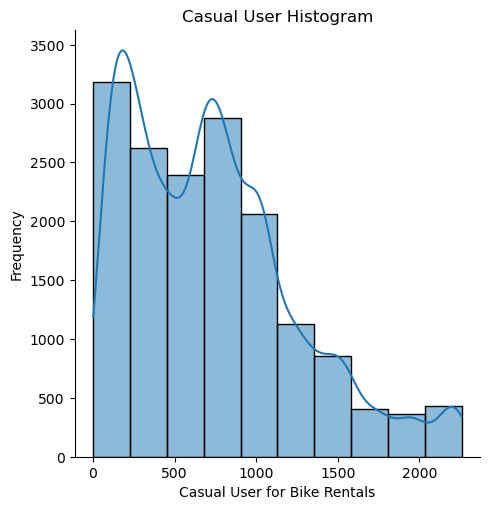

In [24]:
# Histogram Plot for Casual User
sns.displot(data=bike_sharing_df, x="casual", bins=10, kde=True)
plt.title("Casual User Histogram")
plt.xlabel("Casual User for Bike Rentals")
plt.ylabel("Frequency")

#### Box Plot for Casual User
- Membuat box plot dari kolom "casual" untuk melihat bagaimana sensitivitas data tersebut terhadap outlier.

Text(0, 0.5, 'Frequency')

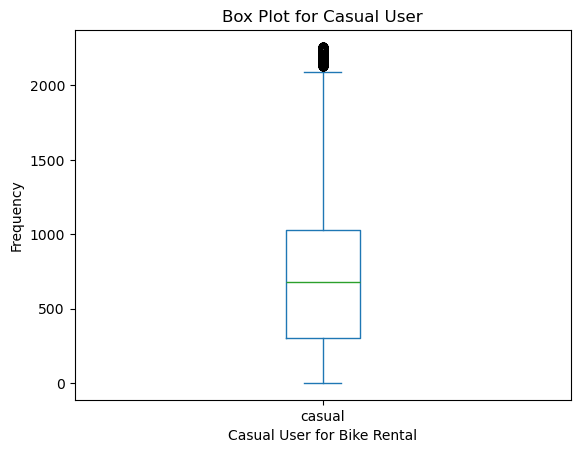

In [25]:
# Box Plot for Casual User
ax = (bike_sharing_df["casual"]).plot.box()
ax.set_title("Box Plot for Casual User")
ax.set_xlabel("Casual User for Bike Rental")
ax.set_ylabel("Frequency")

**Insight**
- Persebaran data dari casual user menunjukkan bentuk distribusi yang skewed ke kanan. Hal ini dapat disimpulkan bahwa mayoritas user casual menggunakan rental sepeda dalam jumlah yang relatif kecil.
- Dari box plot tersebut, terlihat ada beberapa data outlier yang bernilai sangat besar. Outlier ini mencerminkan bahwa terdapat waktu atau hari tertentu dimana membuat casual user sangat tinggi.

#### Histogram for Registered User
- Membuat histogram dari kolom "registered" untuk melihat bagaimana persebaran data dari registered user terhadap total user peminjaman sepeda.

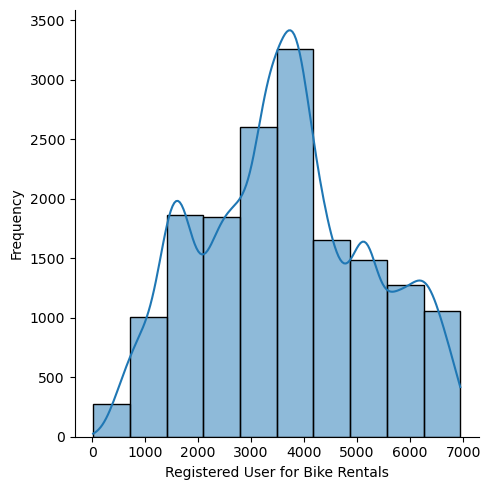

In [26]:
# Histogram Plot for Registered User
ax = sns.displot(x="registered", data=bike_sharing_df, bins=10, kde=True)
ax.set_xlabels("Registered User for Bike Rentals")
ax.set_ylabels("Frequency")

#### Box Plot for Registered User
- Membuat box plot dari registered user agar dapat melihat outlier dari kolom "registered".

Text(0, 0.5, 'Registered User for Bike Rental')

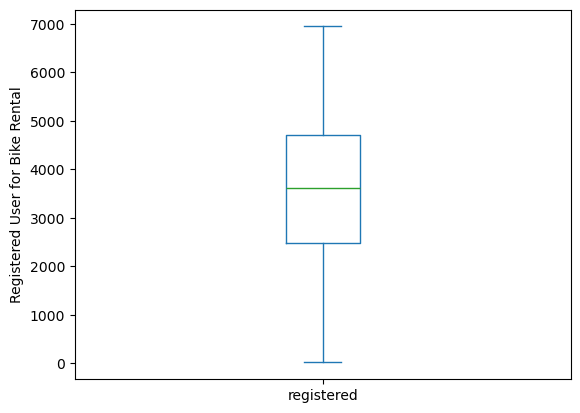

In [27]:
# Box Plot for Registered User
ax = (bike_sharing_df["registered"]).plot.box()
ax.set_ylabel("Registered User for Bike Rental")

**Insight**
- Histogram dari registered user memiliki pola persebaran yang normal dan cenderung lebih konsisten. Hal ini dapat disimpulkan bahwa registered user merupakan loyal customer dari peminjaman sepeda ini.
- Box plot dari registered user tidak memiliki outlier sama sekali. Hal ini dapat disimpulkan bahwa customer behaviour dari registered user cenderung lebih konsisten menggunakan rental sepeda.

#### Histogram for Total User
- Membuat histogram dari total user untuk melihat pola persebaran data dari total user.

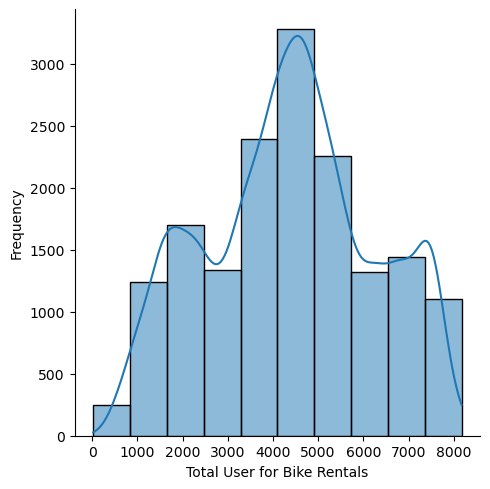

In [28]:
# Histogram Plot for Total User
ax = sns.displot(x="cnt", data=bike_sharing_df, bins=10, kde=True)
ax.set_xlabels("Total User for Bike Rentals")
ax.set_ylabels("Frequency")

#### Box Plot for Total User
- Membuat box plot dari total user untuk melihat outlier pada data.

Text(0, 0.5, 'Total User for Bike Rental')

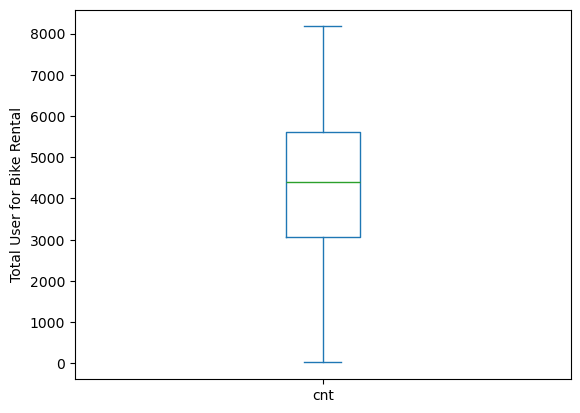

In [29]:
# Box Plot for Total User
ax = (bike_sharing_df["cnt"]).plot.box()
ax.set_ylabel("Total User for Bike Rental")

**Insight**
- Histogram dari total user menunjukkan distribusi yang cenderung normal. Hal ini dapat disimpulkan bahwa mayoritas dari total user berasal dari registered user.
- Box plot dari total user tidak menunjukkan adanya outlier. Hal ini menunjukkan bahwa total user cukup konsisten menggunakan rental sepeda.

## Machine Learning Model

### KNN Algorithm